In [1]:
from GradOCP.core import GradOCP
import numpy as np


N = 5
y_param = 2.0
lr = 0.01

ocp = GradOCP()

x = ocp.add_variable("x_0", size=1, lb=[0], ub=[400], stage=0)
y = ocp.add_parameter("y", size=1)


for k in range(N-1):
    x_next = ocp.add_variable(f"x_{k+1}", size=1, lb=[0], ub=[400], stage=k+1)
    ocp.add_constraint(x_next - x - y, stage=k)
    x = x_next

ocp.set_objective((x_next - 3)**2 + (y - 1)**2)

ocp.build(solver_opts={"ipopt.print_level":0, "print_time":0, "ipopt.sb":"yes"})


We consider the objective function value as a Loss function.

Let $\xi(\theta)$ be the solution to the OCP.  
Let $\theta$ be the parameters.  
Let $J(\xi(\theta), \theta)$ be the objective function.  

The total derivative can be computed as

$$
\frac{dJ}{d\theta} = \frac{\partial J}{\partial \xi} \frac{d\xi}{d\theta} + \frac{\partial J}{\partial \theta} 
$$


In [ ]:
errors = []
y_params = []
for i in range(20):
    res = ocp.solve(p_vals={"y": y_param})
    xT = res["x"][f"x_{N-1}"].item()
    grad_x = np.zeros(N)
    grad_x[-1] = 2*(xT - 3)
    grad_y = 2*(y_param - 1)

    dx_dy = ocp.backward(inversion_method="regularization")
    dJ_dy = dx_dy.T @ grad_x + grad_y

    y_param -= lr * dJ_dy
    errors.append(float(res["J"]))
    y_params.append(y_param.full().item())


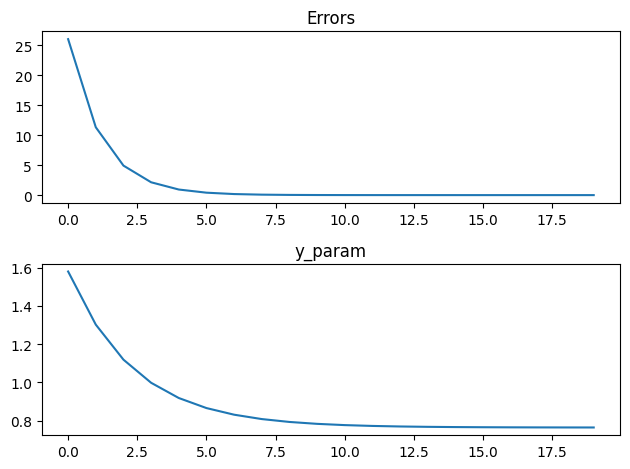

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(errors)
ax1.set_title("Error")

ax2.plot(y_params)
ax2.set_title("y param")

plt.tight_layout()
plt.show()